In [3]:
import argparse
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt

In [18]:
def file_to_numpy(filename):
    """
    Read an input file and convert it to numpy
    """
    df = pd.read_csv(filename)
    return df.to_numpy()

file = pd.read_csv("train.csv")
y = file.iloc[:, 1:2]
x = pd.read_csv("x_transformed.csv")
x = x.iloc[:, 1:]

xHatNames = x.head(0)
xHatNames = xHatNames.T
x = x.to_numpy()
y = y.to_numpy()
y = y.T[0]
# print(y)
# print(len(x[0]))
# print(xHatNames)

def pca_95(xTrain, xTest):
    pca = sklearnPCA(.95)
    pca.fit(xTrain)
    xTrain_pca = pca.transform(xTrain)
    xTest_pca = pca.transform(xTest)
    return xTrain_pca, xTest_pca



means_r2 = np.ones(8)
variances_r2 = np.ones(8)
means_mse = np.ones(8)
variances_mse = np.ones(8)
ratios = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55]
for i in range(0, 8):
    r2_s = np.ones(30)
    mse_s = np.ones(30)
    for j in range(0, 30):
        xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=ratios[i], random_state=j)
        xTrain, xTest = pca_95(xTrain, xTest)
        model = LinearRegression()
        model.fit(xTrain, yTrain)
        yHat = model.predict(xTest)
        r2_s[j] = r2_score(yTest, yHat)
        mse_s[j] = mean_squared_error(yTest, yHat, squared=False)
    means_r2[i]=np.mean(r2_s)
    variances_r2[i]=np.std(r2_s)
    means_mse[i]=np.mean(mse_s)
    variances_mse[i]=np.std(mse_s)
print(means_r2)
print(variances_r2)
print(means_mse)
print(variances_mse)

[0.54937458 0.54266398 0.54339767 0.54087812 0.53358685 0.5318559
 0.5318561  0.52885931]
[0.05265953 0.04415696 0.03970823 0.03908973 0.0316892  0.02802962
 0.02667466 0.02218099]
[0.54937458 0.54266398 0.54339767 0.54087812 0.53358685 0.5318559
 0.5318561  0.52885931]
[0.05265953 0.04415696 0.03970823 0.03908973 0.0316892  0.02802962
 0.02667466 0.02218099]


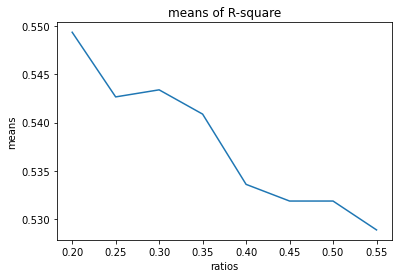

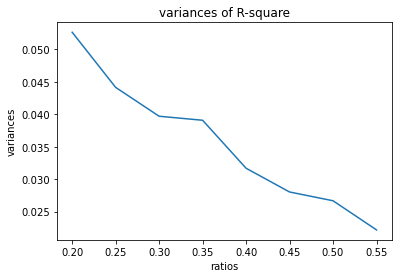

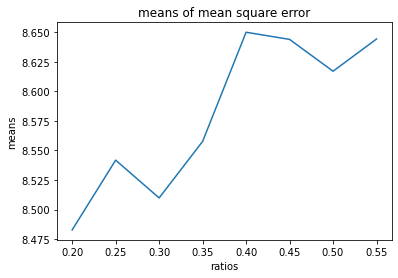

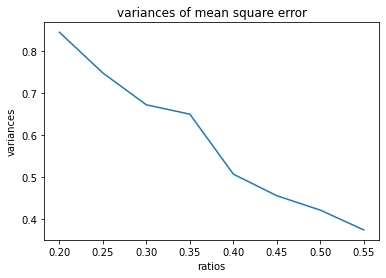

In [19]:
# The graphs
plt.plot(ratios, means_r2)
plt.xlabel("ratios")
plt.ylabel("means")
plt.title("means of R-square")
plt.show()

plt.plot(ratios, variances_r2)
plt.xlabel("ratios")
plt.ylabel("variances")
plt.title("variances of R-square")
plt.show()

plt.plot(ratios, means_mse)
plt.xlabel("ratios")
plt.ylabel("means")
plt.title("means of mean square error")
plt.show()

plt.plot(ratios, variances_mse)
plt.xlabel("ratios")
plt.ylabel("variances")
plt.title("variances of mean square error")
plt.show()